In [22]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.patches as mpatches

import matplotlib as mpl
import scikit_posthocs as sp
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from scipy import stats


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

#Removing warning messages
import warnings
warnings.simplefilter(action = "ignore")


In [23]:
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels


In [24]:
#Import dataset that contains the cluster labels
X = pd.read_csv("df_with_cluster_labels.csv")
X.shape

(17585, 28)

In [25]:
# Drop unnecessary columns
X = X.drop(['Unnamed: 0'], axis=1)


In [26]:
X.head(2)

,start_hour,day,weekend,device,traffic_source,pages_viewed,session_duration,avg_page_duration,home_pct,search_pct,advice_pct,info_pct,product_pct,category_pct,sale_pct,unique_category_pct,unique_product_pct,cart_total_value,cart_total_product_quantity,is_cart_empty,is_logged_on,is_in_UK,previous_total_interactions,is_return_visitor,is_purchase,revenue_generated,Segment K-means
0,16,3,0,0,0,2,43.522,21.761,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,100.0,0.0,0,1,0,1,0,0,0.0,0.0,3
1,7,4,0,0,1,2,66.922,33.461,0.0,0.0,0.0,0.0,50.0,50.0,0.0,100.0,100.0,0.0,0,1,0,1,0,0,0.0,0.0,1


In [27]:
#Convert Numerical Features to Categorical

X.replace({'day': {0:'Monday', 1:'Tuesday',2:'Wednesday',
                       3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}},inplace=True)

X.replace({'device': {0:'Desktop', 1:'Tablet',2:'Mobile'}},inplace=True)

X.replace({'traffic_source': {0:'Other', 1:'Search Engine',2:'Direct Traffic', 3:'Social Media'}},inplace=True)

In [28]:
#Creating separate dataframes for different clusters
df_seg_1 = X.loc[X["Segment K-means"] == 0]
df_seg_2 = X.loc[X["Segment K-means"] == 1]
df_seg_3 = X.loc[X["Segment K-means"] == 2]
df_seg_4 = X.loc[X["Segment K-means"] == 3]
df_seg_5 = X.loc[X["Segment K-means"] == 4]
df_seg_6 = X.loc[X["Segment K-means"] == 5]




### Revenue Comparison

In [89]:
#Compare revenues across clusters 
col = 'revenue_generated'
stats.kruskal(df_seg_1[col], 
                    df_seg_2[col], 
                    df_seg_3[col],
                    df_seg_4[col],
                    df_seg_5[col],
                    df_seg_6[col])

KruskalResult(statistic=1299.8884022528089, pvalue=6.753046402633374e-279)

In [69]:
col = 'revenue_generated'
data = [df_seg_1[col], 
        df_seg_2[col],  
        df_seg_3[col], 
        df_seg_4[col],
        df_seg_5[col],
        df_seg_6[col]]

#perform Dunn's test using a Bonferonni correction for the p-values
sp.posthoc_dunn(data, p_adjust = 'bonferroni')


,1,2,3,4,5,6
1,1.000000e+00,1.000000e+00,3.726949e-158,1.000000e+00,1.000000e+00,0.008837
2,1.000000e+00,1.000000e+00,2.978827e-233,1.000000e+00,1.000000e+00,0.003279
3,3.726949e-158,2.978827e-233,1.000000e+00,4.841161e-115,8.949514e-254,0.000006
4,1.000000e+00,1.000000e+00,4.841161e-115,1.000000e+00,1.000000e+00,0.010203
5,1.000000e+00,1.000000e+00,8.949514e-254,1.000000e+00,1.000000e+00,0.002357
6,8.837458e-03,3.278869e-03,6.115638e-06,1.020350e-02,2.357168e-03,1.000000


### Visualisations of Categorical Variables

In [30]:
#Defining function that returns the share of the categories in a single column
def get_shares_single_col_df(df, col):
    '''
    Input: a dataframe and a column name in the df
    For that column in the df, calculate the share of unique values
    Output: a new dataframe containg the unique value names and their share 
    '''
    df_new = df[col].value_counts().to_frame().reset_index()
    df_new.columns = ['cat', 'count']
    df_new['share'] = df_new['count']/df_new['count'].sum()
    return df_new

In [31]:
#Defining function to generate stacked bar plot
def predictor_stacked_bar(df_1, df_2, df_3, df_4, df_5, df_6, title, colors1, colors2, colors3, colors4,colors5, colors6, handles, bbox_to_anchor_width ):
    #Creating plot architecture
    fig, ax = plt.subplots(figsize = (17, 9), ncols = 3, nrows = 2, dpi=300)
    fig.subplots_adjust(hspace = 0.2, wspace=0.3)
    sns.despine(top = True)
    sns.set(style='white')
    fig.suptitle(title,
             color = "#696969",
             weight = "bold",
             size = 19, y=1.)

    #Plotting for cluster 1
    colors = colors1
    bottom = 0
    for index, color in zip(range(len(df_1)), colors):
        pct = df_1.loc[index, "share"]
        if pct > 0.05:
            ax[0,0].text(0, bottom + pct/2, "{}%".format(int(round((pct * 100),0))), va = "center", ha = "center",fontsize = 16)
        category = df_1.loc[index, 'cat']
        ax[0,0].bar(0, pct, width = 0.3, color = color, bottom = bottom)
        bottom += pct
    
    #Plotting for cluster 2
    colors = colors2
    bottom = 0
    for index, color in zip(range(len(df_2)), colors):
        pct = df_2.loc[index, "share"]
        if pct > 0.05:
            ax[0,1].text(0, bottom + pct/2, "{}%".format(int(round((pct * 100),0))), va = "center", ha = "center",fontsize = 16)
        category = df_2.loc[index, 'cat']
        ax[0,1].bar(0, pct, width = 0.3, color = color, bottom = bottom)
        bottom += pct
    
    #Plotting for cluster 3
    colors = colors3
    bottom = 0
    for index, color in zip(range(len(df_3)), colors):
        pct = df_3.loc[index, "share"]
        if pct > 0.05:
            ax[0,2].text(0, bottom + pct/2, "{}%".format(int(round((pct * 100),2))), va = "center", ha = "center",fontsize = 16)
        category = df_3.loc[index, 'cat']
        ax[0,2].bar(0, pct, width = 0.3, color = color, bottom = bottom)
        bottom += pct
        
    #Plotting for cluster 4
    colors = colors4
    bottom = 0
    for index, color in zip(range(len(df_4)), colors):
        pct = df_4.loc[index, "share"]
        if pct > 0.05:
            ax[1,0].text(0, bottom + pct/2, "{}%".format(int(round((pct * 100),2))), va = "center", ha = "center",fontsize = 16)
        category = df_4.loc[index, 'cat']
        ax[1,0].bar(0, pct, width = 0.3, color = color, bottom = bottom)
        bottom += pct

    #Plotting for cluster 5
    colors = colors5
    bottom = 0
    for index, color in zip(range(len(df_5)), colors):
        pct = df_5.loc[index, "share"]
        if pct > 0.05:
            ax[1,1].text(0, bottom + pct/2, "{}%".format(int(round((pct * 100),2))), va = "center", ha = "center",fontsize = 16)
        category = df_5.loc[index, 'cat']
        ax[1,1].bar(0, pct, width = 0.3, color = color, bottom = bottom)
        bottom += pct
    
    #Plotting for cluster 6
    colors = colors6
    bottom = 0
    for index, color in zip(range(len(df_6)), colors):
        pct = df_6.loc[index, "share"]
        if pct > 0.05:
            ax[1,2].text(0, bottom + pct/2, "{}%".format(int(round((pct * 100),2))), va = "center", ha = "center",fontsize = 16)
        category = df_6.loc[index, 'cat']
        ax[1,2].bar(0, pct, width = 0.3, color = color, bottom = bottom)
        bottom += pct
    
    #Setting parameters
    axes = [ax[0,0], ax[0,1], ax[0,2],ax[1,0], ax[1,1], ax[1,2]]
    for axis in axes:
        axis.axes.get_xaxis().set_visible(False)
        axis.set_ylim([0,1])
        axis.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        axis.tick_params(axis='both', which='major', labelsize=17)
    ax[0,0].set_title('Cluster 1', style = "italic", color = "#696969",fontsize=17)
    ax[0,1].set_title('Cluster 2', style = "italic", color = "#696969",fontsize=17)
    ax[0,2].set_title('Cluster 3', style = "italic", color = "#696969",fontsize=17)
    ax[1,0].set_title('Cluster 4', style = "italic", color = "#696969",fontsize=17)
    ax[1,1].set_title('Cluster 5', style = "italic", color = "#696969",fontsize=17)
    ax[1,2].set_title('Cluster 6', style = "italic", color = "#696969",fontsize=17)
    
    

    legend = ax[0,2].legend(handles = handles, 
                    loc = "upper right", 
                    bbox_to_anchor = (bbox_to_anchor_width,1.02,0.15,0),
                    frameon = False, fontsize =17)


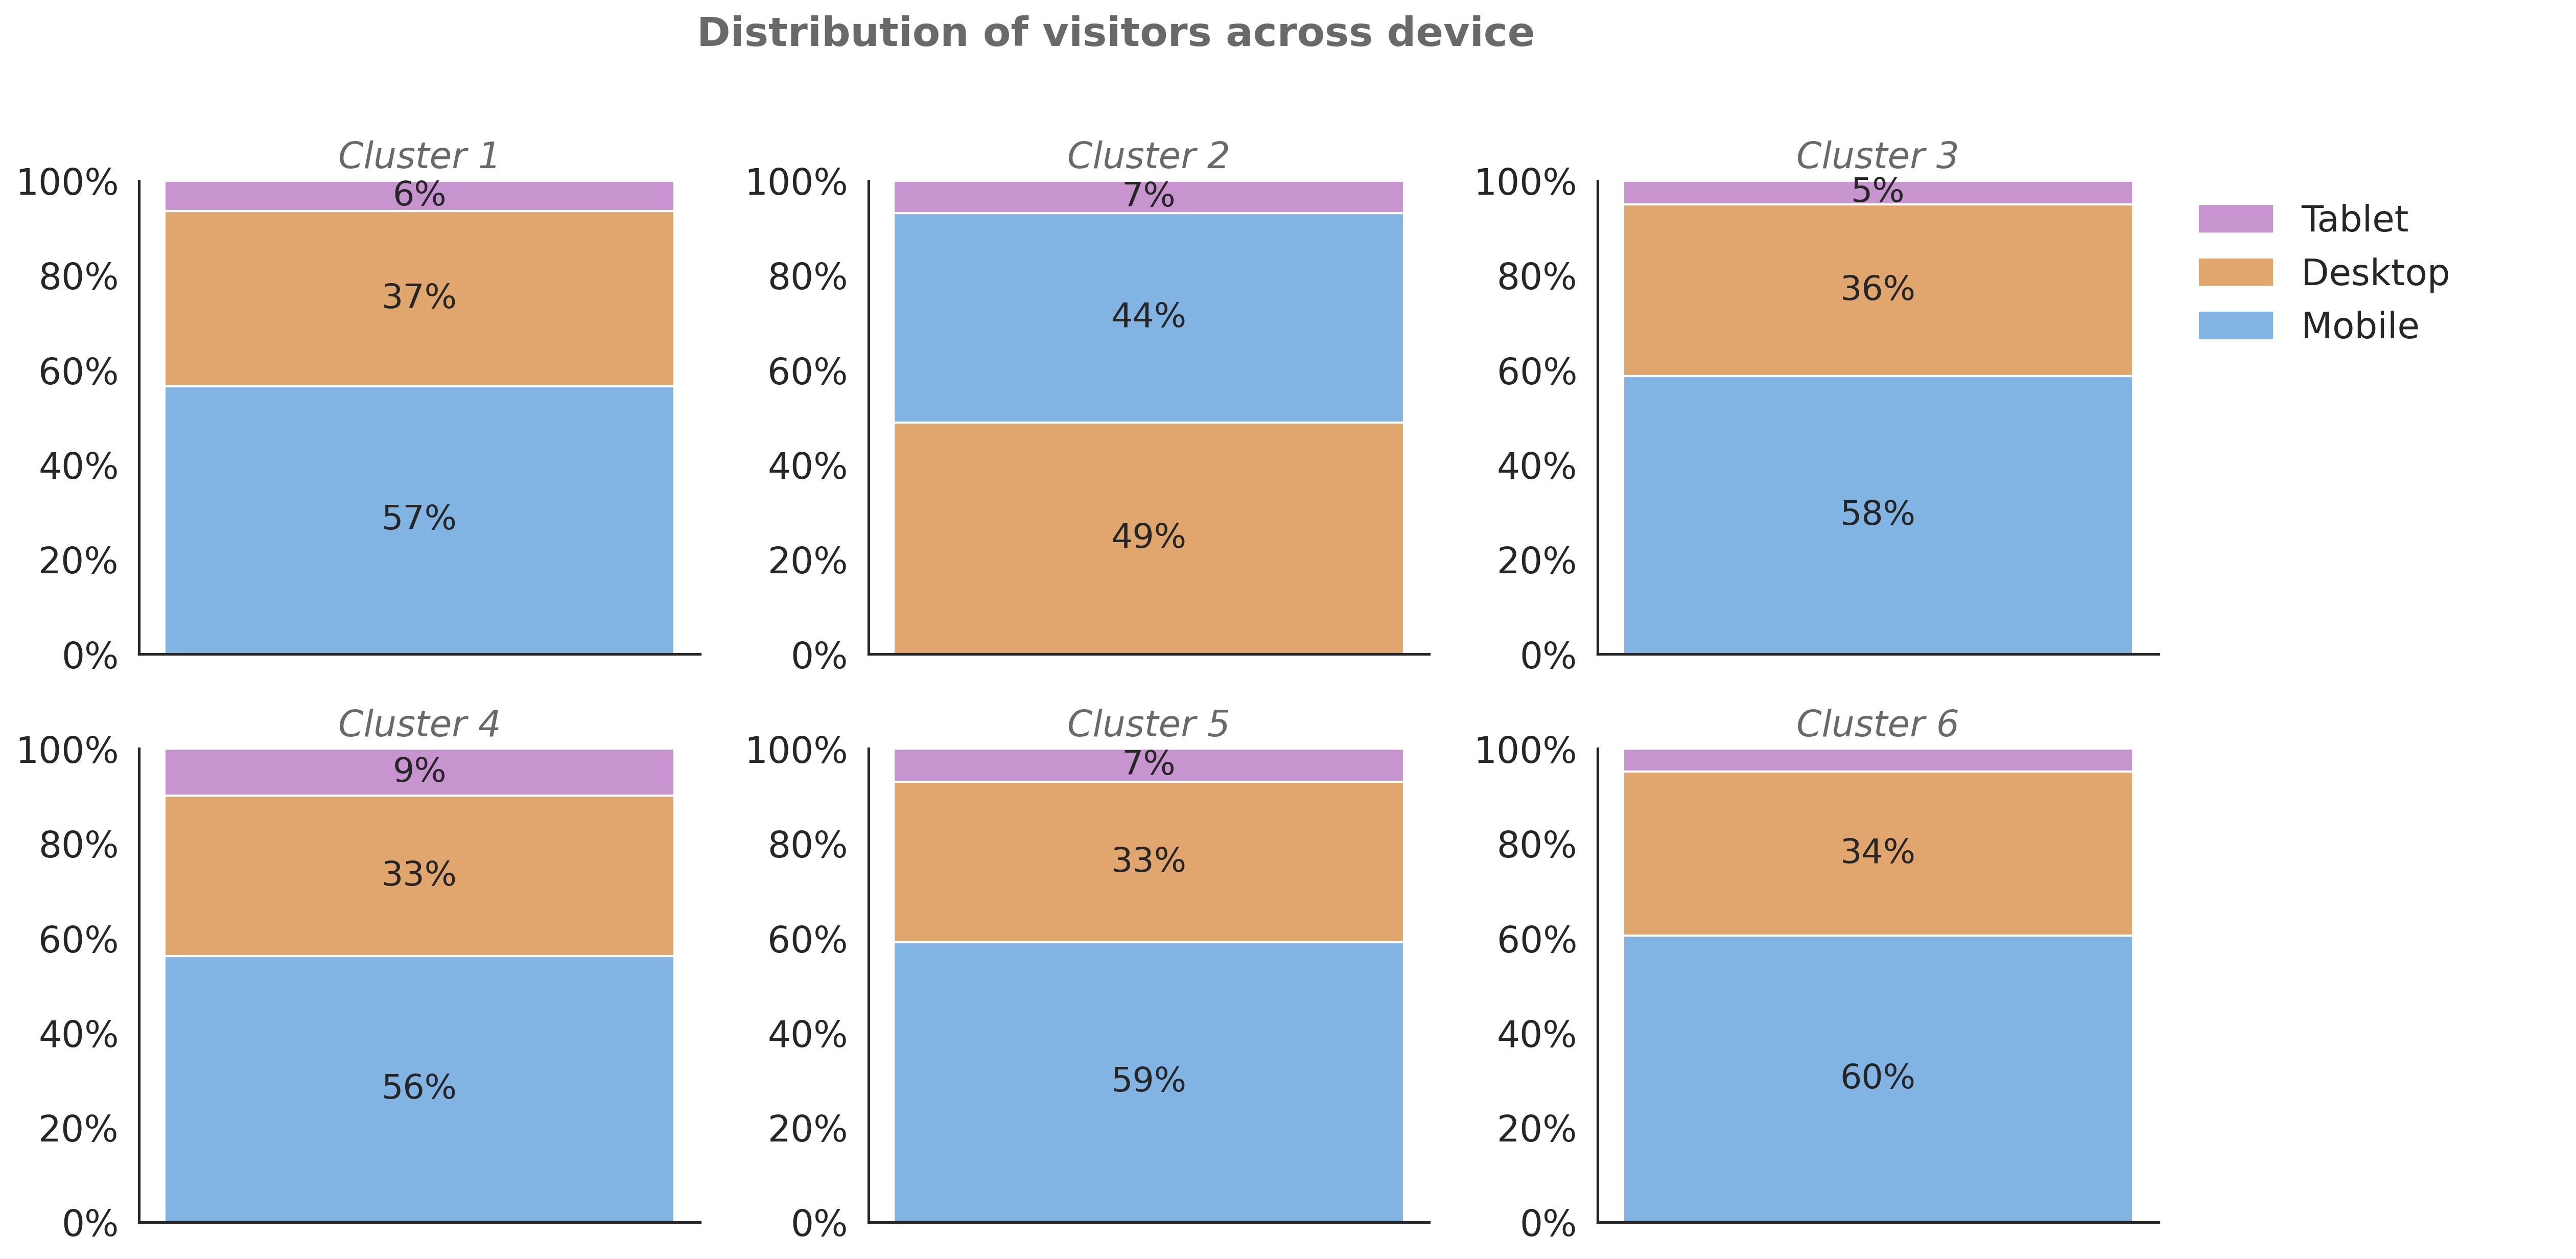

In [84]:
df_device_1 = get_shares_single_col_df(df_seg_1, 'device')
df_device_2 = get_shares_single_col_df(df_seg_2, 'device')
df_device_3 = get_shares_single_col_df(df_seg_3, 'device')
df_device_4 = get_shares_single_col_df(df_seg_4, 'device')
df_device_5 = get_shares_single_col_df(df_seg_5, 'device')
df_device_6 = get_shares_single_col_df(df_seg_6, 'device')

colors1, colors2, colors3 = ["#81b4e3", "#E1A66E", "#C894D0"], ["#E1A66E", "#81b4e3", "#C894D0"], ["#81b4e3", "#E1A66E", "#C894D0"]
colors4, colors5, colors6 = ["#81b4e3", "#E1A66E", "#C894D0"], ["#81b4e3", "#E1A66E", "#C894D0"], ["#81b4e3", "#E1A66E", "#C894D0"] 

handles = [ 'Tablet            ','Desktop','Mobile']

for i in range(len(handles)):
     handles[i] = mpatches.Patch(color = colors1[::-1][i], label = str(handles[i]))

title = "Distribution of visitors across device"

bbox_to_anchor_width = 1.6

#Creating plot
predictor_stacked_bar(df_device_1, df_device_2, df_device_3, df_device_4, df_device_5, df_device_6, title, colors1, colors2, colors3, colors4, colors5, colors6, handles, bbox_to_anchor_width )

plt.savefig('images/clusters_across_device.png', bbox_inches='tight')



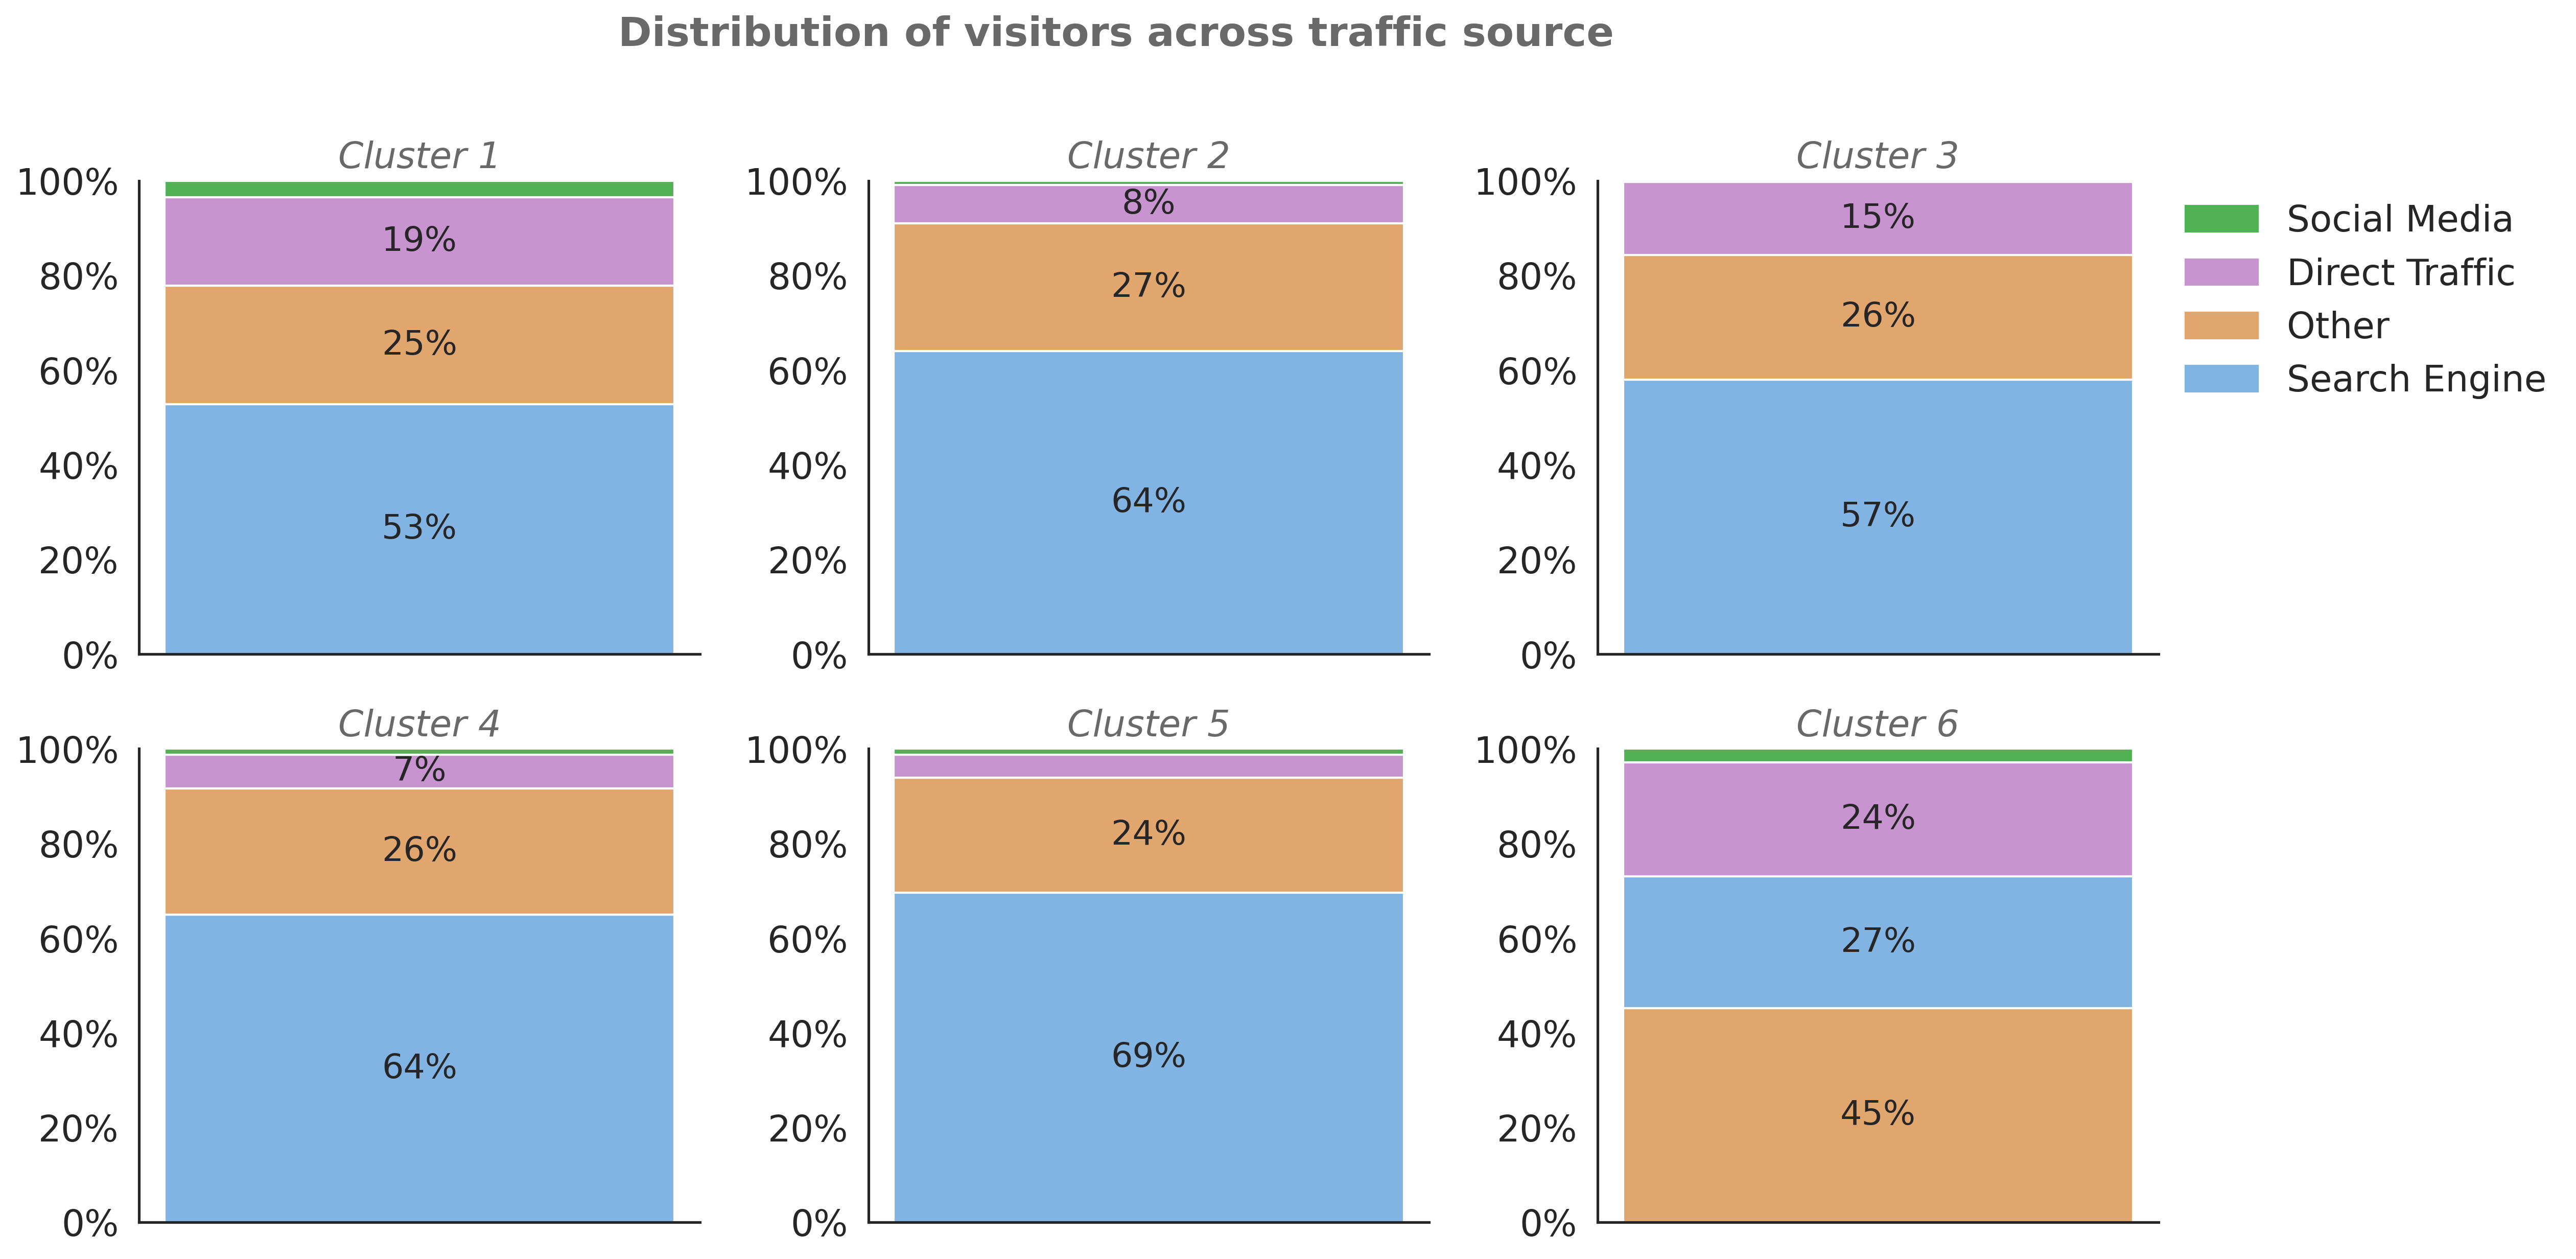

In [53]:
df_traffic_source_1 = get_shares_single_col_df(df_seg_1, 'traffic_source')
df_traffic_source_2 = get_shares_single_col_df(df_seg_2, 'traffic_source')
df_traffic_source_3 = get_shares_single_col_df(df_seg_3, 'traffic_source')
df_traffic_source_4 = get_shares_single_col_df(df_seg_4, 'traffic_source')
df_traffic_source_5 = get_shares_single_col_df(df_seg_5, 'traffic_source')
df_traffic_source_6 = get_shares_single_col_df(df_seg_6, 'traffic_source')


colors1, colors2, colors3 = ["#81b4e3", "#E1A66E", "#C894D0", "#51B155"], ["#81b4e3", "#E1A66E", "#C894D0", "#51B155"], ["#81b4e3", "#E1A66E", "#C894D0", "#51B155"]
colors4, colors5, colors6 = ["#81b4e3", "#E1A66E", "#C894D0", "#51B155"], ["#81b4e3", "#E1A66E", "#C894D0", "#51B155"], ["#E1A66E", "#81b4e3", "#C894D0", "#51B155"] 

handles = [ 'Social Media','Direct Traffic','Other', 'Search Engine']

for i in range(len(handles)):
     handles[i] = mpatches.Patch(color = colors1[::-1][i], label = str(handles[i]))

title = "Distribution of visitors across traffic source"

bbox_to_anchor_width = 1.6

#Creating plot
predictor_stacked_bar(df_traffic_source_1, df_traffic_source_2, df_traffic_source_3,df_traffic_source_4, df_traffic_source_5, df_traffic_source_6, title, colors1, colors2, colors3, colors4, colors5, colors6, handles, bbox_to_anchor_width )

plt.savefig('images/clusters_across_traffic_source.png', bbox_inches='tight')


In [54]:
#Defining function to generate line plot
def get_lineplot(df, title, xlabel, y_lim_max, x_lim_max, labelsize,bbox_to_anchor_width):
    #Creating plot architecture
    fig = plt.figure(figsize = [17,6], dpi =300)

    #Customize colors
    colors = ["#71A3DA", "#BDD2E1","#E1A66E","#51B155","#C894D0","#A09EA0"]
    customPalette = sns.set_palette(sns.color_palette(colors))

    #Plotting graph
    ax = sns.lineplot('cat', 'share', hue = 'cluster', data = df, palette = customPalette,
                       marker='o', linewidth = 1, ms = 8)

    #Set aesthetic parameters
    sns.set(style = 'white')
    sns.despine()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

    #Set labels, title, legend, axis parameters
    plt.xlabel(xlabel, fontsize = labelsize, labelpad = 10)
    plt.ylabel('Share of visitors', fontsize = labelsize, labelpad = 10)
    plt.title(title,
              fontsize = labelsize, 
              y = 1.05,
              color = "#696969",
              weight = "bold")
    labels = ["Cluster 1", "Cluster 2", "Cluster 3","Cluster 4","Cluster 5","Cluster 6"]
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, labels,fontsize = labelsize, loc ='upper right',bbox_to_anchor = (bbox_to_anchor_width,1.02,-0.33,0), frameon = False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)
    ax.set_ylim([0,y_lim_max])
    plt.yticks(np.arange(0,y_lim_max+1, 2.0))
    plt.xticks(np.arange(0, x_lim_max, step=1)) 
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    


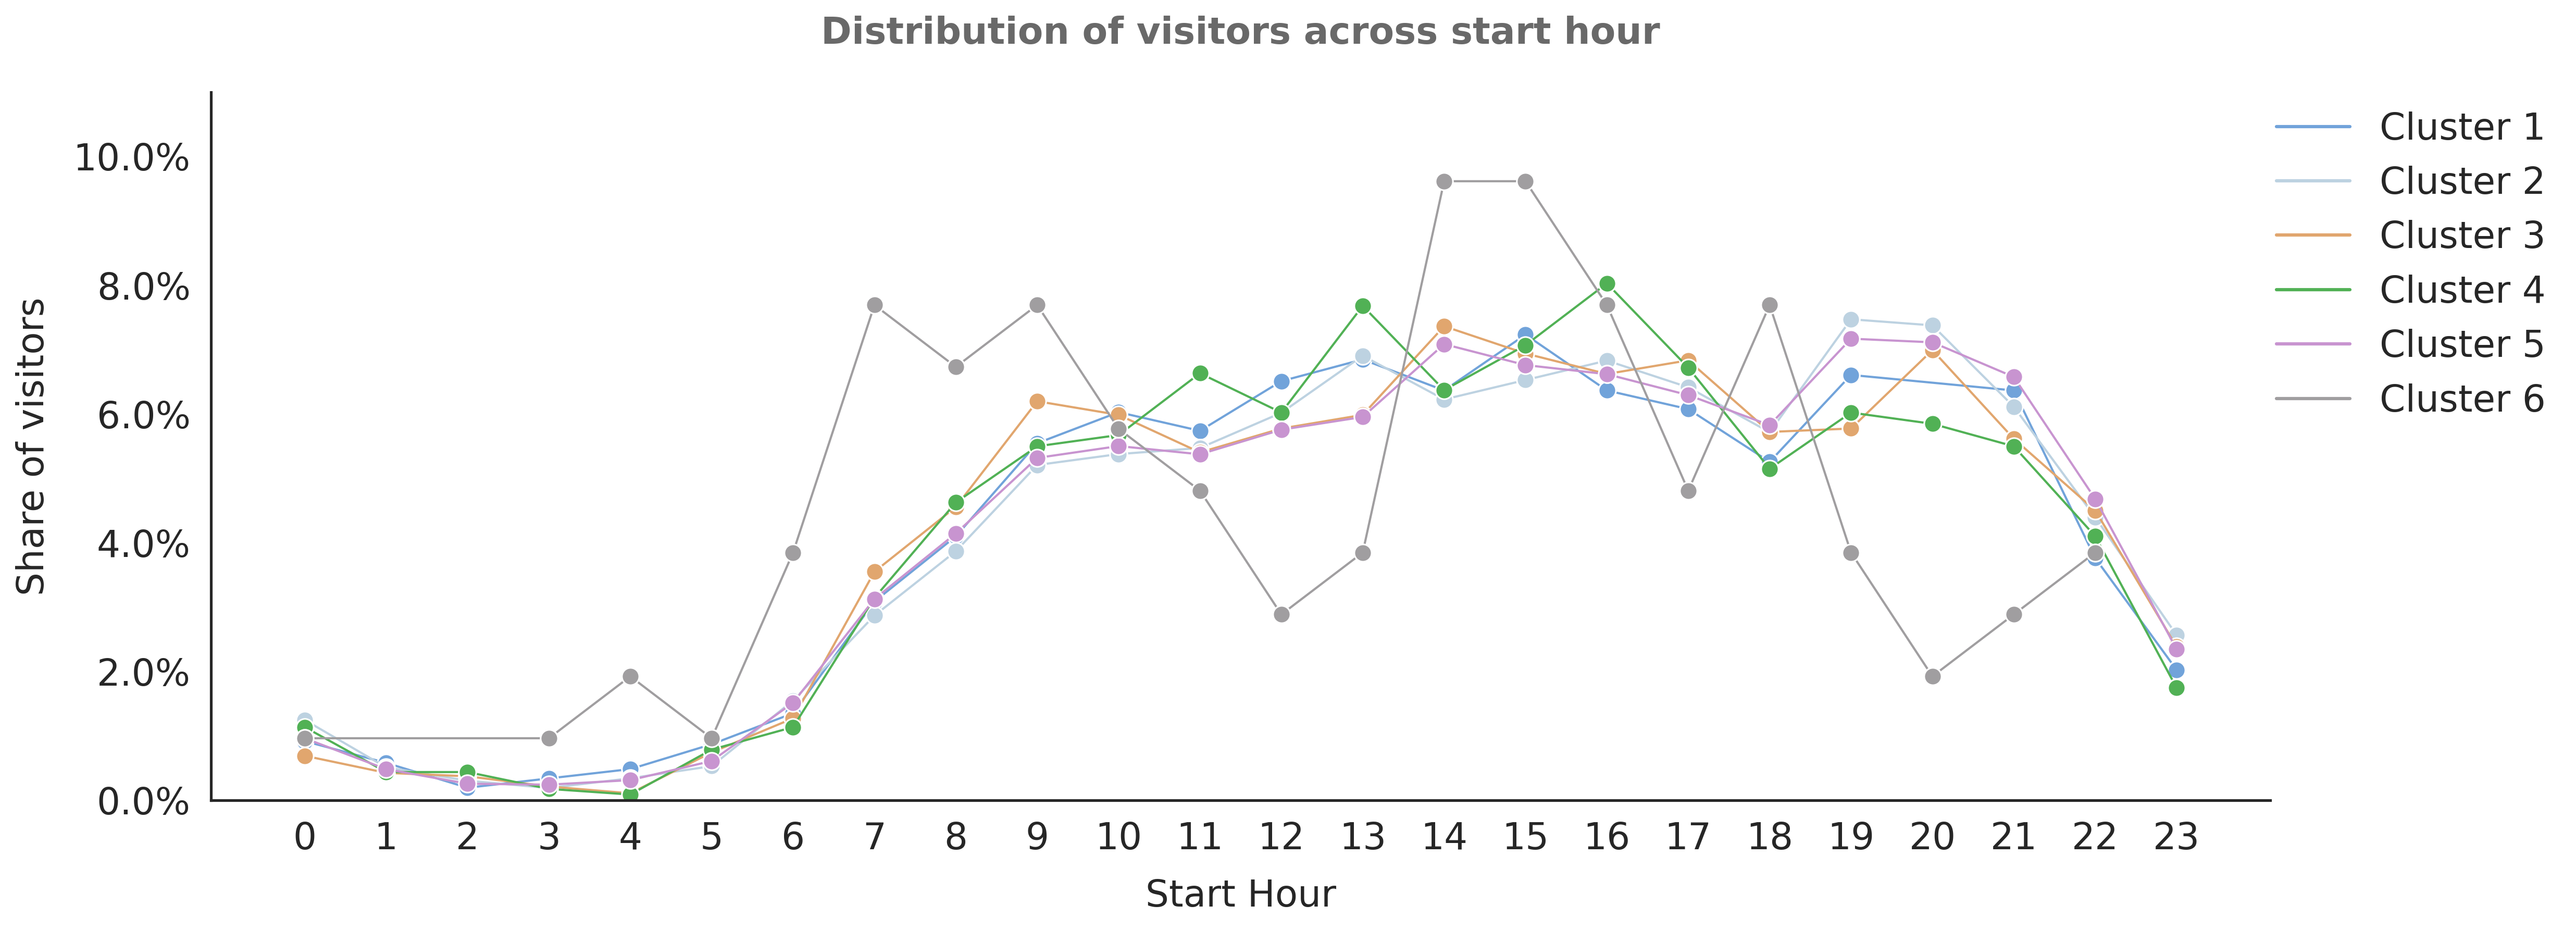

In [85]:
df_start_hour_1 = get_shares_single_col_df(df_seg_1, 'start_hour')
df_start_hour_1 = df_start_hour_1.reindex([18,20, 23, 22, 21, 19, 17, 15, 13, 11, 9, 10,
                                           4, 2, 5, 1, 6, 8, 12, 3,  7, 14, 16]).reset_index(drop=True)
df_start_hour_2 = get_shares_single_col_df(df_seg_2, 'start_hour')
df_start_hour_3 = get_shares_single_col_df(df_seg_3, 'start_hour')
df_start_hour_4 = get_shares_single_col_df(df_seg_4, 'start_hour')
df_start_hour_5 = get_shares_single_col_df(df_seg_5, 'start_hour')
df_start_hour_6 = get_shares_single_col_df(df_seg_6, 'start_hour')


start_hour =  pd.concat([df_start_hour_1.assign(cluster='Cluster 1'), 
                         df_start_hour_2.assign(cluster='Cluster 2'),
                         df_start_hour_3.assign(cluster='Cluster 3'),
                         df_start_hour_4.assign(cluster='Cluster 4'), 
                         df_start_hour_5.assign(cluster='Cluster 5'),
                         df_start_hour_6.assign(cluster='Cluster 6')],
                         axis = 0, ignore_index = True)
start_hour['share'] = start_hour['share']*100

title = 'Distribution of visitors across start hour'
xlabel =  'Start Hour'
y_lim_max = 11
x_lim_max = 24
labelsize = 17

get_lineplot(start_hour, title, xlabel, y_lim_max, x_lim_max, labelsize,1.48)

plt.savefig('images/clusters_across_start_hour.png', bbox_inches='tight')



In [58]:
#Defining function to generate bar plot
def get_bar_plot(df, title, xlabel, y_lim_max, labelsize):
    #Creating plot architecture
    fig = plt.figure(figsize = [17,6], dpi =300)

    #Customize colors
    colors = ["#71A3DA", "#BDD2E1","#E1A66E","#51B155","#C894D0","#A09EA0"]
    customPalette = sns.set_palette(sns.color_palette(colors))

    #Plotting graph
    ax = sns.barplot(x = 'cat', y = 'share', data = df, hue = 'cluster', palette = customPalette)

    #Set aesthetic parameters
    sns.set(style = 'white')
    sns.despine()
       
    #Set labels, title, legend, axis parameters
    plt.xlabel(xlabel, fontsize = labelsize, labelpad = 10)
    plt.ylabel('Share of visitors',fontsize = labelsize, labelpad = 10)
    plt.title(title,
              fontsize = labelsize, 
              y = 1.05,
              color = "#696969",
              weight = "bold")
    plt.tick_params(axis = 'both', which = 'major', labelsize = labelsize)
    labels = ["Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6"]
    h, l = ax.get_legend_handles_labels()
    ax.legend(h, labels, fontsize = labelsize, loc = 'upper right', frameon = False, bbox_to_anchor = (1.48,1.02,-0.33,0))
    ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)
    ax.set_ylim([0,y_lim_max])
    plt.yticks(np.arange(0,y_lim_max+1, 5.0))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    



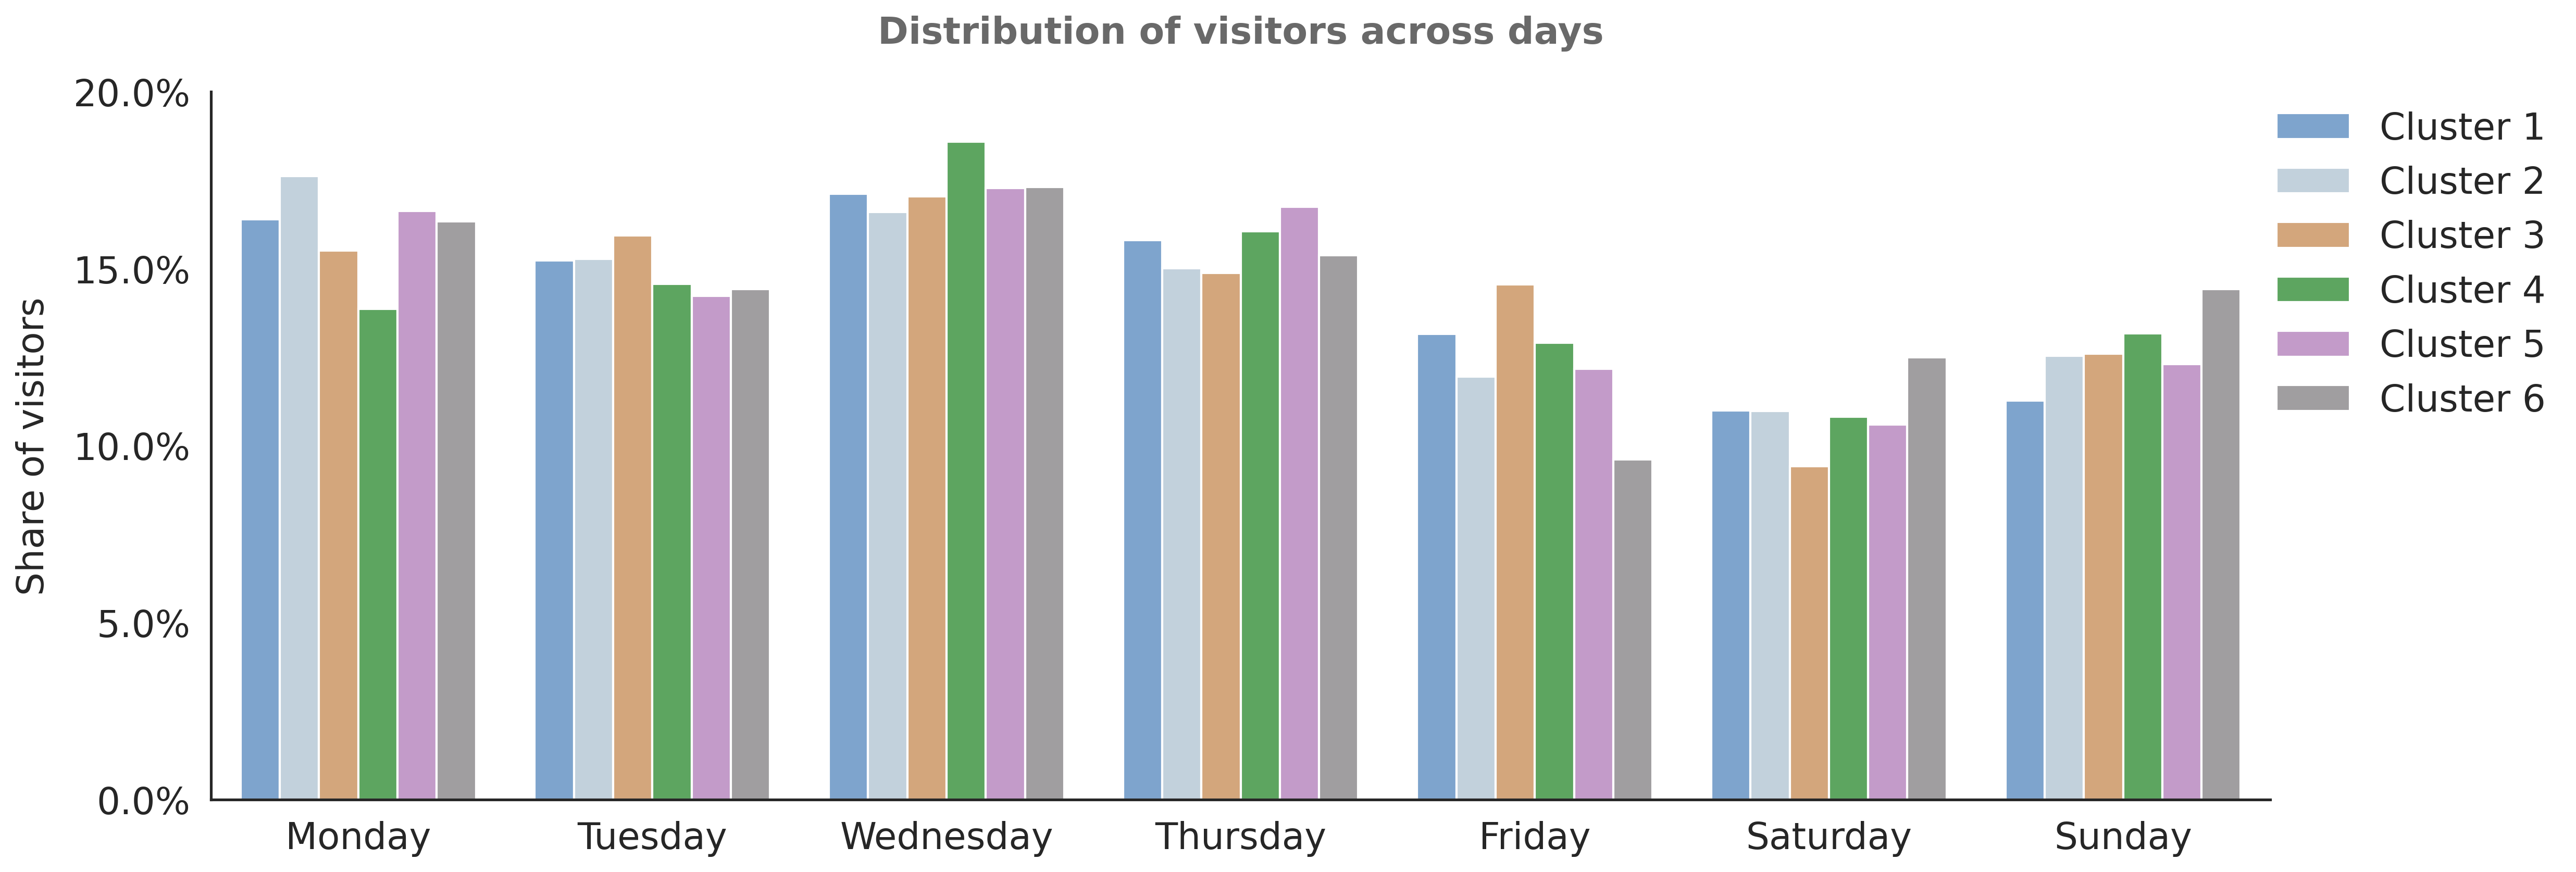

In [92]:
df_day_1 = get_shares_single_col_df(df_seg_1, 'day')
df_day_1 = df_day_1.reindex([1, 3, 0, 2, 4, 6, 5]).reset_index(drop=True)
df_day_2 = get_shares_single_col_df(df_seg_2, 'day')
df_day_3 = get_shares_single_col_df(df_seg_3, 'day')
df_day_4 = get_shares_single_col_df(df_seg_4, 'day')
df_day_5 = get_shares_single_col_df(df_seg_5, 'day')
df_day_6 = get_shares_single_col_df(df_seg_6, 'day')


day =  pd.concat([df_day_1.assign(cluster='Cluster 1'), 
                         df_day_2.assign(cluster='Cluster 2'),
                         df_day_3.assign(cluster='Cluster 3'),
                         df_day_4.assign(cluster='Cluster 4'), 
                         df_day_5.assign(cluster='Cluster 5'),
                         df_day_6.assign(cluster='Cluster 6')],
                         axis = 0, ignore_index = True)
day['share'] = day['share']*100

title = 'Distribution of visitors across days'
xlabel =  ''
y_lim_max = 20
x_lim_max = 24
labelsize = 17

get_bar_plot(day, title, xlabel, y_lim_max, labelsize)

plt.savefig('images/clusters_across_day.png', bbox_inches='tight')
